In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import PorterStemmer
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings('ignore')

# Load dataset
train_ds = pd.read_csv(r'C:\Users\MUNWAR BASHA\OneDrive\Desktop\rvr\sem 6\cm322\mldatasets\Dataset', delimiter="\t")

# Display first few rows and check class distribution
print("First 5 rows of the dataset:")
print(train_ds.head(5))
pd.set_option('max_colwidth', 800)
print("\nClass distribution:")
print(train_ds.sentiment.value_counts())




First 5 rows of the dataset:
   sentiment  \
0          1   
1          1   
2          1   
3          1   
4          1   

                                                                                                                           text  
0                                                                                       The Da Vinci Code book is just awesome.  
1  this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.  
2                                                                                              i liked the Da Vinci Code a lot.  
3                                                                                              i liked the Da Vinci Code a lot.  
4                                                      I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.  

Class distribution:
sentiment
1    3943
0    2975
Name: count, dtype: int64


In [11]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


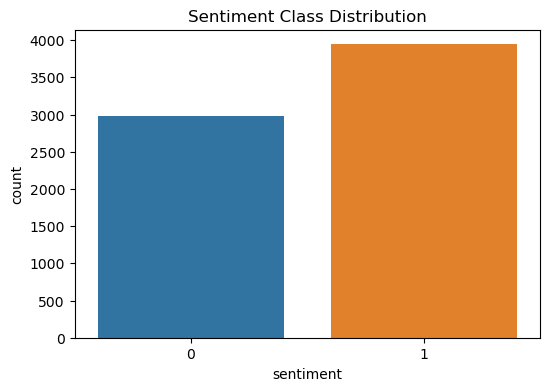

In [6]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=train_ds)
plt.title("Sentiment Class Distribution")
plt.show()

In [7]:
# Custom stop words
my_stop_words = text.ENGLISH_STOP_WORDS.union(['harry', 'potter', 'code', 'vinci', 'da', 'mountain', 'movie', 'movies'])

# Stemming function for TF-IDF
stemmer = PorterStemmer()
analyzer = TfidfVectorizer().build_analyzer()

def stemmed_words(doc):
    stemmed = [stemmer.stem(w) for w in analyzer(doc)]
    return [word for word in stemmed if word not in my_stop_words]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer=stemmed_words, max_features=1000)
feature_vector = tfidf_vectorizer.fit(train_ds.text)
train_ds_features = tfidf_vectorizer.transform(train_ds.text)


In [8]:

# Get feature names and their TF-IDF scores
features = feature_vector.get_feature_names_out()
features_counts = np.sum(train_ds_features.toarray(), axis=0)
feature_counts_df = pd.DataFrame({'features': features, 'tfidf_sum': features_counts})
print("\nTop 15 features by TF-IDF sum:")
print(feature_counts_df.sort_values('tfidf_sum', ascending=False).head(15))


Top 15 features by TF-IDF sum:
      features   tfidf_sum
414       love  765.920395
83   brokeback  667.700015
791       suck  643.888454
45      awesom  609.369514
303      harri  596.942489
922         wa  453.781843
447       movi  391.712458
441    mission  341.318000
351     imposs  341.144676
400       like  319.941242
305       hate  245.792642
56      becaus  157.836017
615     realli  150.921349
386       know  141.783508
784     stupid  122.957133


In [9]:
 #Prepare data for training
train_X, test_X, train_y, test_y = train_test_split(
    train_ds_features, train_ds.sentiment, test_size=0.3, random_state=42
)

# Train Logistic Regression model
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(train_X, train_y)

# Predict on test set
test_ds_predicted = lr_clf.predict(test_X)

# Evaluate model
print("\nClassification Report:")
print(metrics.classification_report(test_y, test_ds_predicted))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



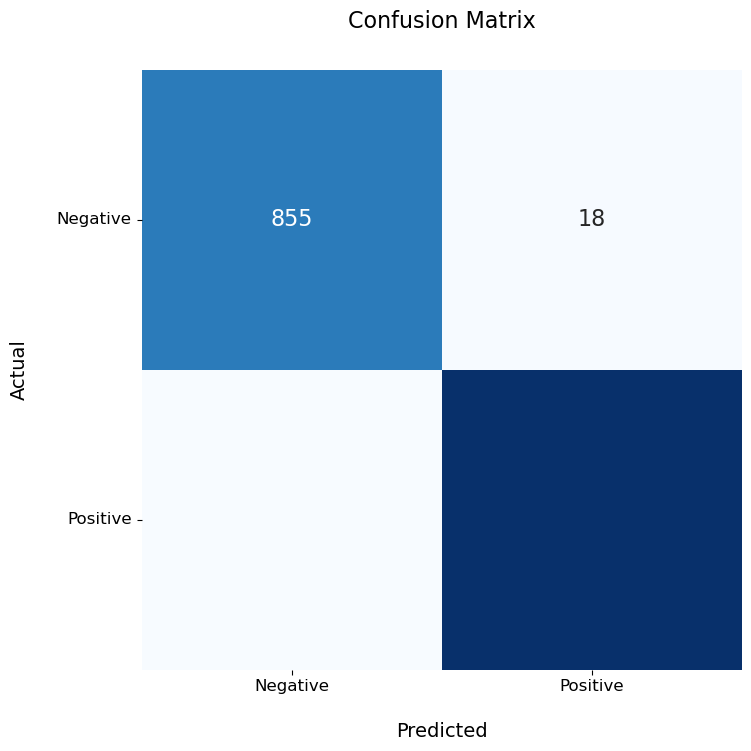

Confusion Matrix Values:
[[ 855   18]
 [   9 1194]]

Top 10 features with highest positive coefficients (Positive Sentiment):
     feature  coefficient
414     love     8.596392
45    awesom     6.865474
400     like     4.601582
55    beauti     3.867224
351   imposs     2.413561
441  mission     2.413561
283     good     1.801690
289    great     1.712510
205    enjoy     1.628669
922       wa     1.601226

Top 10 features with highest negative coefficients (Negative Sentiment):
     feature  coefficient
791     suck    -7.894087
305     hate    -6.179319
784   stupid    -3.640359
79      bore    -3.557861
165  depress    -3.556943
335  horribl    -2.898469
829  terribl    -2.701585
468       oh    -2.043445
394     left    -1.877151
261     fuck    -1.764362


In [21]:
# Confusion Matrix
# Confusion Matrix
# Confusion Matrix# Ensure Matplotlib inline backend for Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix
cm = metrics.confusion_matrix(test_y, test_ds_predicted)

# Set a large figure size to ensure enough space
plt.figure(figsize=(12, 10))

# Plot the heatmap with adjustments for Jupyter
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                      xticklabels=['Negative', 'Positive'], 
                      yticklabels=['Negative', 'Positive'],
                      annot_kws={"size": 16},  # Larger annotations
                      square=True,  # Square cells for better proportion
                      cbar=False)  # Remove colorbar to free up space

# Set title and labels with significant padding
plt.title("Confusion Matrix", pad=30, fontsize=16)
plt.xlabel("Predicted", labelpad=20, fontsize=14)
plt.ylabel("Actual", labelpad=20, fontsize=14)

# Ensure labels are fully visible
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)

# Adjust layout to fit within Jupyter's rendering
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.95, top=0.85, bottom=0.25)  # Increased bottom margin

# Save the plot to a file to confirm rendering
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Print the confusion matrix values as a fallback
print("Confusion Matrix Values:")
print(cm)


# Feature importance (Logistic Regression coefficients)
coef_df = pd.DataFrame({
    'feature': features,
    'coefficient': lr_clf.coef_[0]
})
print("\nTop 10 features with highest positive coefficients (Positive Sentiment):")
print(coef_df.sort_values('coefficient', ascending=False).head(10))
print("\nTop 10 features with highest negative coefficients (Negative Sentiment):")
print(coef_df.sort_values('coefficient', ascending=True).head(10))